In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_final.csv to test_final.csv
Saving train_final.csv to train_final.csv


In [ ]:
import pandas as pd

test = pd.read_csv("test_final.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23525 entries, 0 to 23524
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23525 non-null  object 
 1   lead_time                       23525 non-null  int64  
 2   arrival_date_year               23525 non-null  int64  
 3   arrival_date_month              23525 non-null  object 
 4   arrival_date_week_number        23525 non-null  int64  
 5   arrival_date_day_of_month       23525 non-null  int64  
 6   stays_in_weekend_nights         23525 non-null  int64  
 7   stays_in_week_nights            23525 non-null  int64  
 8   adults                          23525 non-null  int64  
 9   children                        23525 non-null  float64
 10  babies                          23525 non-null  int64  
 11  meal                            23525 non-null  object 
 12  country                         

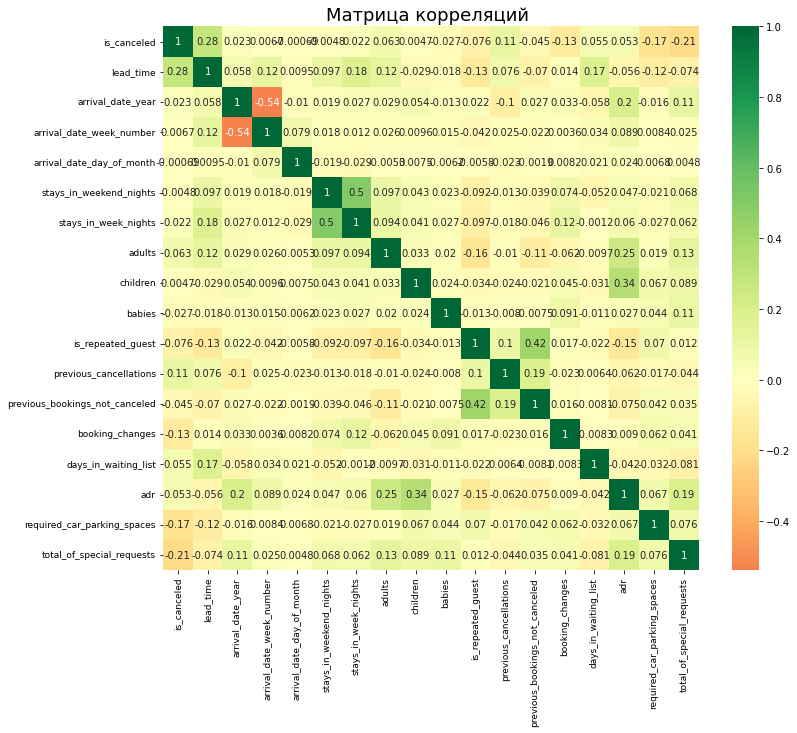

In [ ]:
train = pd.read_csv("train_final.csv")

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in train:
  if (train[i].dtype=='object'):
    train[i] = le.fit_transform(train[i])
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,0,3,2016,3,7,12,0,2,2,...,4,5,0,0,0,2,81.0,1,0,315
1,0,1,50,2016,9,47,18,1,2,2,...,0,0,0,0,0,2,93.6,0,2,553
2,0,0,14,2015,11,37,7,1,5,2,...,5,5,0,0,0,0,166.0,0,3,161
3,0,0,18,2015,2,50,6,2,0,2,...,0,0,0,0,0,2,107.0,0,0,247
4,0,1,263,2016,11,40,29,2,4,2,...,0,0,0,0,0,2,100.3,0,0,288


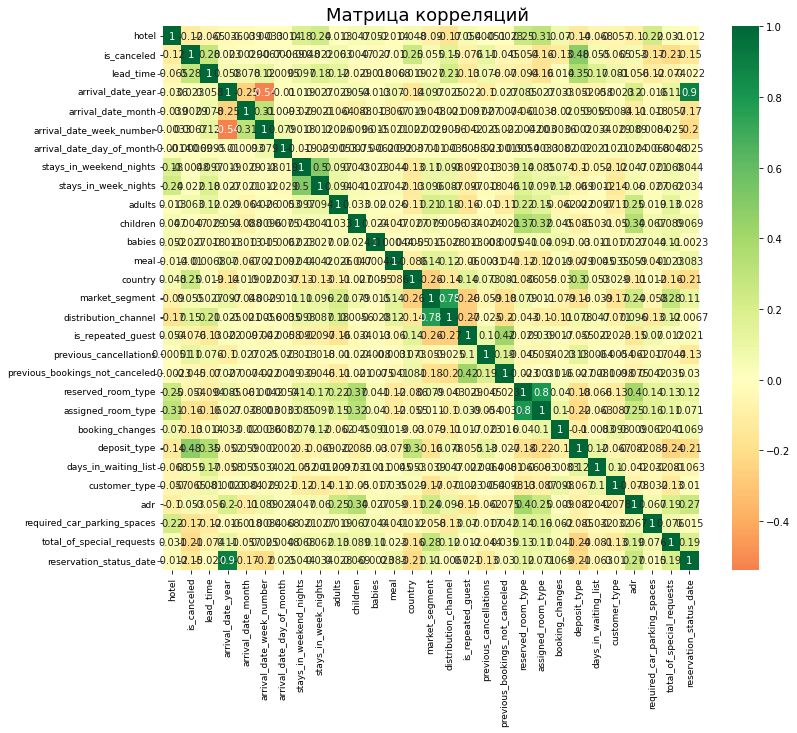

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций ', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in test:
  if (test[i].dtype=='object'):
    test[i] = le.fit_transform(test[i])
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,73,2016,5,28,6,0,2,1,0.0,...,0,0,0,0,0,2,107.10,0,0,436
1,0,37,2015,10,43,24,2,5,1,1.0,...,0,0,0,0,0,2,87.78,0,0,211
2,0,190,2017,0,14,6,2,3,2,0.0,...,0,0,0,0,0,2,88.40,0,0,545
3,0,287,2016,1,35,24,1,4,2,0.0,...,1,1,1,0,0,2,76.71,0,0,514
4,1,386,2016,10,43,20,1,3,2,0.0,...,0,0,0,0,0,3,49.00,0,0,530


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X = train.drop(['is_canceled'], axis = 1)
y = train["is_canceled"]

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['is_canceled'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_st = scaler.fit_transform(os_data_X)

train = pd.DataFrame(X_st, columns = X.columns)
train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1.565808,-0.987942,-0.229732,-0.698509,-1.501227,-0.428185,-0.896844,-0.239069,0.269387,-0.267121,...,1.920022,2.140006,-0.301599,-0.425128,-0.136324,-0.195979,-0.458688,4.378428,-0.646517,-0.702760
1,-0.638648,-0.563541,-0.229732,1.022517,1.482979,0.271463,0.147758,-0.239069,0.269387,-0.267121,...,-0.567545,-0.665577,-0.301599,-0.425128,-0.136324,-0.195979,-0.194140,-0.221764,2.040505,0.345295
2,-0.638648,-0.888614,-1.644862,1.596192,0.736927,-1.011225,0.147758,1.414224,0.269387,5.027595,...,2.541914,2.140006,-0.301599,-0.425128,-0.136324,-3.791480,1.325956,-0.221764,3.384015,-1.380913
3,-0.638648,-0.852495,-1.644862,-0.985347,1.706794,-1.127833,1.192360,-1.341264,0.269387,-0.267121,...,-0.567545,-0.665577,-0.301599,-0.425128,-0.136324,-0.195979,0.087203,-0.221764,-0.646517,-1.002204
4,-0.638648,1.359809,-0.229732,1.596192,0.960743,1.554151,1.192360,0.863127,0.269387,-0.267121,...,-0.567545,-0.665577,-0.301599,-0.425128,-0.136324,-0.195979,-0.053469,-0.221764,-0.646517,-0.821657


In [ ]:
scaler = StandardScaler()
st = scaler.fit_transform(test)

test = pd.DataFrame(st, columns = X.columns)
test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,-0.634667,-0.462861,-0.232068,-0.134474,0.059016,-1.109345,-0.928225,-0.278773,-1.471895,-0.264110,...,-0.552406,-0.617772,-0.275441,-0.553723,-0.15045,-0.201632,0.058900,-0.171483,-0.60415,-0.102240
1,-0.634667,-0.778393,-1.636235,1.268909,1.182209,0.934735,1.073837,1.317270,-1.471895,2.187815,...,-0.552406,-0.617772,-0.275441,-0.553723,-0.15045,-0.201632,-0.272139,-0.171483,-0.60415,-1.087407
2,-0.634667,0.562620,1.172099,-1.537857,-0.989298,-1.109345,1.073837,0.253241,0.199825,-0.264110,...,-0.552406,-0.617772,-0.275441,-0.553723,-0.15045,-0.201632,-0.261516,-0.171483,-0.60415,0.375018
3,-0.634667,1.412805,-0.232068,-1.257180,0.583172,0.934735,0.072806,0.785255,0.199825,-0.264110,...,0.047204,-0.053840,1.495953,-0.553723,-0.15045,-0.201632,-0.461819,-0.171483,-0.60415,0.239284
4,1.575629,2.280520,-0.232068,1.268909,1.182209,0.480495,0.072806,0.253241,0.199825,-0.264110,...,-0.552406,-0.617772,-0.275441,-0.553723,-0.15045,1.654879,-0.936618,-0.171483,-0.60415,0.309340


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_st, os_data_y, test_size=1/3, random_state=42)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (41805, 28), (41805, 1)
Test shape: (20903, 28), (20903, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# создаем модель
# как подобрать лучшее число соседей?
scores = []
for i in range(1,15):
    score = {}
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    answers = knn.predict(X_test) # метод predict возвращает вектор ответов для X_test
    
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    score['recall'] = recall_score(answers,y_test)
    score['presicion'] = precision_score(answers,y_test)
    
    scores.append(score)

scores = pd.DataFrame(scores)
scores

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

,k,accuracy,recall,presicion
0,1,0.857437,0.844076,0.878335
1,2,0.849113,0.904473,0.782107
2,3,0.850213,0.836516,0.872142
3,4,0.850261,0.879612,0.813072
4,5,0.847677,0.834370,0.869188
5,6,0.847630,0.869056,0.820122
6,7,0.844233,0.833395,0.862138
7,8,0.844616,0.860382,0.824314
8,9,0.844233,0.832232,0.863948
9,10,0.846003,0.856611,0.832698


In [ ]:
scores['mean']=scores[['accuracy', 'recall', 'presicion']].mean(axis=1)

In [ ]:
scores

,k,accuracy,recall,presicion,mean
0,1,0.857437,0.844076,0.878335,0.859949
1,2,0.849113,0.904473,0.782107,0.845231
2,3,0.850213,0.836516,0.872142,0.852957
3,4,0.850261,0.879612,0.813072,0.847648
4,5,0.847677,0.834370,0.869188,0.850412
5,6,0.847630,0.869056,0.820122,0.845603
6,7,0.844233,0.833395,0.862138,0.846589
7,8,0.844616,0.860382,0.824314,0.843104
8,9,0.844233,0.832232,0.863948,0.846804
9,10,0.846003,0.856611,0.832698,0.845104


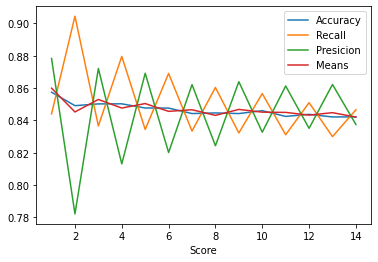

In [ ]:
plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.plot(scores['k'], scores['recall'], label='Recall')
plt.plot(scores['k'], scores['presicion'], label='Presicion')
plt.plot(scores['k'], scores['mean'], label='Means')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()

In [ ]:
y_test.shape

(14880,)

In [ ]:
knn = KNeighborsClassifier(5)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(test)



/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
df = pd.DataFrame(y_pred, columns=['is_canceled'])
df = df.reset_index()
df.to_csv("name.csv", index=False)